## basic import setup for a bioscrape model

In [2]:
#Using Bioscrape: Basic Imports

#A Model is a CRN with some bells and whistles
from bioscrape.types import Model, import_sbml

#py_simulate_model is a helper function that takes care of may details for you
from bioscrape.simulator import py_simulate_model

#For arrays and plotting
import numpy as np
import pylab as plt

I'm going to try to do a model of population capping, if that won't work, i'll just try doing cells that respond to an external source of ahl signal

## Species

In [2]:
#Species: A list of all the species
species = ["S", "T", "T:S", "G", "TSG", "P", "TSG:P", "M", "R", "M:R", "GFP"]

In [3]:
#Params
params = [("kahlbind", 100), ("kahlunb", 1), 
          ("ktfbind", 50), ("ktfunb", 10), 
          ("kpolbind", 50), ("kpolunb", 2), 
          ("kribbind", 40), ("kribunb", 10),
          ("ktx", 2), ("ktl", 5), ("delta", .5),
         ("kahl", 0.01), ("ahldeg", 100)]

In [4]:
#Reactions: A list of reactions [rxn1, rxn2...]. Each reaction is a tuple ([Input Species], [Output Species], "propensity_type", {propensity_parameters})

#make and degrade signal
rxnS = ([], ["S"], "massaction", {"k":"kahl"})
rxnDegS = (["S"], [], "massaction", {"k":"ahldeg"})

#ahl binds and unbinds transcription factor
rxnAHL = (["T", "S"], ["T:S"], "massaction", {"k":"kahlbind"})
rxnAHL0 = (["T:S"], ["T", "S"], "massaction", {"k":"kahlunb"})

#active transcription factor binds dna
rxnDNA = (["T:S", "G"], ["TSG"], "massaction", {"k":"ktfbind"})
rxnDNA0 = (["TSG"], ["T:S", "G"], "massaction", {"k":"ktfunb"})

#DNA transcription factor complex binds polymerase
rxnPol = (["TSG", "P"], ["TSG:P"], "massaction", {"k":"kpolbind"})
rxnPol0 = (["TSG:P"], ["TSG", "P"], "massaction", {"k":"kpolunb"})

#transcription
rxnTx = (["TSG:P"], ["TSG", "P", "M"], "massaction", {"k":"ktx"})
rxnDegM = (["M"], [], "massaction", {"k":"delta"})

#ribosome binds mrna
rxnRib = (["M", "R"], ["M:R"], "massaction", {"k":"kribbind"})
rxnRib0 = (["M:R"], ["M", "R"], "massaction", {"k":"kribunb"})

#Translation
rxntl = (["M:R"], ["M", "R", "GFP"], "massaction", {"k":"ktl"})
rxnDegGFP = (["GFP"], [], "massaction", {"k":"delta"})



reactions = [rxnS, rxnDegS, rxnAHL, rxnAHL0, rxnDNA, rxnDNA0, rxnPol, rxnPol0,
             rxnTx, rxnRib, rxnRib0, rxntl, rxnDegS, rxnDegGFP, rxnDegM]

In [10]:
#An initial condition for each species (uninitialized species default to 0)

# species = ["S", "T", "T:S", "G", "TSG", "TSG:P", "M", "R", "M:R", "GFP"]

x0 = {
    "T":10,
    "G":1,
    "P":25,
    "R":100,
    "S":0,
    "T:S":0,
    "TSG":0,
    "TSG:P":0,
    "M":0,
    "M:R":0,
    "GFP":0
}

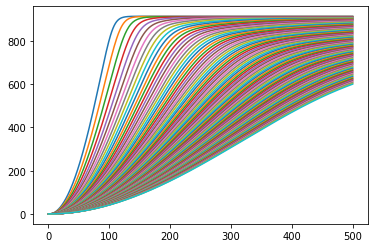

In [12]:
#Bioscrape is Object Oritened: Models, Propensities, Simulators, etc. are all Objects

#Instantiate the Model [The only object must of us will care about]
M = Model(species = species, reactions = reactions, parameters = params, initial_condition_dict = x0)

#Simulate the Model

timepoints = np.linspace(0, 500, 500)


#Change the degredation rate of X, T, and S all at once
degs = np.linspace(0, 10000, 100)

for d in degs:
    M.set_parameter("ahldeg", d) #It much more efficient to change model paramters than re-instantiate new models
    Results = py_simulate_model(timepoints, Model = M)
    
    plt.plot(timepoints, Results["GFP"], label = "GFP")

UnboundLocalError: local variable 'reactant' referenced before assignment

C:\Users\geeze\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The following species are uninitialized and their value has been defaulted to 0: S, T:S, TSG, TSG:P, M, M:R, GFP, 
  """


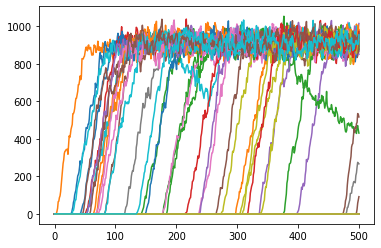

In [7]:
#Switching to Stochastic Simulation is easy!
Results_stoch = py_simulate_model(timepoints, Model = M, stochastic = True) #py_simulate_model takes care of all other objects for you

#Instantiate the Model [The only object must of us will care about]
M = Model(species = species, reactions = reactions, parameters = params, initial_condition_dict = x0)


#Simulate the Model

timepoints = np.linspace(0, 500, 500)


#Change the degredation rate of X, T, and S all at once
degs = np.linspace(0, 10000, 100)

for d in degs:
    M.set_parameter("ahldeg", d) #It much more efficient to change model paramters than re-instantiate new models
    Results_stoch = py_simulate_model(timepoints, Model = M, stochastic = True) #py_simulate_model takes care of all other objects for you
    
    plt.plot(timepoints, Results_stoch["GFP"], label = "GFP")

In [35]:
#Species: A list of all the species
species = ["C", "E", "S", "P"]

# Params
params = [("kbind", 1), ("kun", 1), 
          ("kenz", 2)]

In [36]:
#Reactions: A list of reactions [rxn1, rxn2...]. Each reaction is a tuple ([Input Species], [Output Species], "propensity_type", {propensity_parameters})

#enzyme and substrate bind and unbind
rxnBind = (["E", "S"], ["C"], "massaction", {"k":"kbind"})
rxnUnB = (["C"], ["S", "E"], "massaction", {"k":"kun"})

#enz does the job
rxnEnz = (["C"], ["P", "E"], "massaction", {"k":"kenz"})




reactions = [rxnBind, rxnUnB, rxnEnz]

In [41]:
#An initial condition for each species (uninitialized species default to 0)

x0 = {
    "C":0,
    "E":10,
    "S":10,
    "P":0,
}

In [42]:
#Instantiate the Model [The only object must of us will care about]
M = Model(species = species, reactions = reactions, parameters = params, initial_condition_dict = x0)

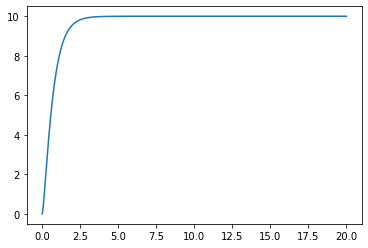

In [43]:
#Simulate the Model

timepoints = np.linspace(0, 20, 500)

Results = py_simulate_model(timepoints, Model = M)
    
plt.plot(timepoints, Results["P"], label = "P")

In [4]:
M = import_sbml('sequestration_sbml_test.xml')

In [13]:
M.set_species()

TypeError: set_species() takes exactly one argument (0 given)

SyntaxError: invalid syntax (<ipython-input-15-10a7440cfc5f>, line 1)

In [ ]:

timepoints = np.linspace(0, 20, 500)

Results = py_simulate_model(timepoints, Model = M)
    
# plt.plot(timepoints, Results["P"], label = "P")

In [6]:
Results

,dna_B,rna_B,protein_B,dna_B_2x_protein_actB,protein_Ribo,complex_protein_RNAase_rna_B,complex_dna_B_protein_RNAP,protein_RNAase,complex_dna_B_2x_protein_actB_protein_RNAP,protein_RNAP,...,complex_protein_Ribo_rna_A,complex_dna_A_2x_protein_actA_protein_RNAP,rna_A,dna_A_2x_protein_actA,complex_dna_A_protein_RNAP,dna_A,complex_protein_RNAase_rna_A,protein_actA,protein_actB,time
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040080
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080160
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.120240
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.160321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.839679
496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.879760
497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.919840
498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.959920
